#SWU Machine Learning


**데이터사이언스학과 2022111731 김채연**

#**[Practice 1] : Regression**


## [0]: 문제정의 (Problem Define)
세계 행복지수(World Happiness Report) 데이터를 활용해
행복지수 예측하는 선형 회귀 모델을 만들어 봅니다.
머신러닝 모델링 중 회귀모델링을 통해,
행복지수에 영향을 주는 요소를 파악하고, 행복지수를 예측해 봅니다.


*   y=f(x)
*  y:행복지수
*  x:행복지수에 영향을 주는 요소들(Data Set에서 columns)
*  f:회귀모델링(Regression)






## [1]: 라이브러링 불러오기 (Libraries Setting )


In [4]:
### 사용할 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)

##[2]: 데이터 수집하기 (Data Collection)


####[2.1]: 사용할 데이터 셋을 가져옵니다: World Happiness Report


*   World Happiness Report 데이터(년도 컬럼 포함)를 사용합니다.

*  행복지수는 각 나라별 1000명의 사람들에게 자신의 삶의 만족도를 조사한 갤럽의 월드 폴(World Poll)을 바탕으로 구매력 기준 GDP, 기대수명, 사회적 지지, 선택의 자유, 아량, 부정부패 등 6가지 변수를 고려하여 평가된다.

*   총 165개국의 행복지수 데이터를 포함한다.




In [5]:
df = pd.read_excel('/content/DataForTable2.1.xls')


In [6]:
#데이터셋을 불러와서 첫 세 줄을 출력하여 데이터의 구성을 살펴봅니다.
df.head(3)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324


###[2.2]: 데이터에서 변수의 의미를 살펴봅니다:



*   Features(Columns/Attributes/Xs) Descriptions

1. 'Country name': 국가 이름
2. 'year': 데이터가 기록된 연도
3. 'Life Ladder': 행복 지수
4. 'Log GDP per capita': 1인당 GDP의 로그 값 (소득 수준)
5. 'Social support': 사회적 지원 수준
6. 'Healthy life expectancy at birth': 출생 시 건강 수명 기대치
7. 'Freedom to make life choices': 삶의 선택의 자유
8. 'Generosity': 관대함 지수
9. 'Perceptions of corruption': 부패에 대한 인식
10. 'Positive affect': 긍정적 감정 평균 빈도
11. 'Negative affect': 부정적 감정 평균 빈도








### [3]: 데이터 탐색하기 (Data Exploration)


* 데이터의 각 변수(features, attributes, columns, x들)의 기본 정보 및 특성을
  자세히 살펴보겠습니다.




    [3-1]: 데이터셋 기본 정보 파악

    [3-2]: 종속 변수 (목표 변수) 탐색

    [3-3]: 설명 변수 (독립변수/특징변수/속성)탐색

    [3-4]: 설명변수와 종속변수 간의 관계 탐색

In [7]:
### 그래프의 배경 설정 : sns --> seaborn 라이브러리 이용
sns.set_style('darkgrid')

### [3.1]: 데이터셋 기본 정보를 파악합니다




In [8]:
### 데이터 셋 구조 보기
df.shape

(2363, 11)

In [9]:
### 해석) 행이 2363개 , 열이 11, 행복지수를 예측하는데 사용한 변수가 11개입니다.

In [10]:
### [결측치] : 비어있는 데이터를 찾습니다.
### 컬럼(변수, 특성, x)에 결측치가 있는지 확인합니다.
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

In [11]:
# 결측치를 median 값으로 처리
#숫자형 컬럼이기에 median으로 결측치 처리
df['Log GDP per capita'].fillna(df['Log GDP per capita'].median(), inplace=True)
df['Social support'].fillna(df['Social support'].median(), inplace=True)
df['Healthy life expectancy at birth'].fillna(df['Healthy life expectancy at birth'].median(), inplace=True)
df['Freedom to make life choices'].fillna(df['Freedom to make life choices'].median(), inplace=True)
df['Generosity'].fillna(df['Generosity'].median(), inplace=True)
df['Perceptions of corruption'].fillna(df['Perceptions of corruption'].median(), inplace=True)
df['Positive affect'].fillna(df['Positive affect'].median(), inplace=True)
df['Negative affect'].fillna(df['Negative affect'].median(), inplace=True)


In [12]:
#결측치 다시 확인
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [13]:
### [data type]을 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2363 non-null   float64
 4   Social support                    2363 non-null   float64
 5   Healthy life expectancy at birth  2363 non-null   float64
 6   Freedom to make life choices      2363 non-null   float64
 7   Generosity                        2363 non-null   float64
 8   Perceptions of corruption         2363 non-null   float64
 9   Positive affect                   2363 non-null   float64
 10  Negative affect                   2363 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [14]:
### 해셕) "Country name"(나라이름)만 문자형 변수(범주형 변수)이고, 이를 제외한 모든 변수는 숫자형입니다.


In [15]:
### [통계] 슷지형 변수만 뽑아서 기본 통계를 해 봅니다.
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000
mean,2014.763860,5.483562,9.400896,0.809507,63.447103,0.750608,-0.000649,0.746844,0.651995,0.273085
std,5.059436,1.125523,1.145268,0.120891,6.756316,0.138323,0.158644,0.180327,0.105714,0.086842
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.228301,-0.339547,0.035198,0.178886,0.082737
25%,2011.000000,4.646750,8.520145,0.744106,59.545000,0.662055,-0.108147,0.696495,0.572984,0.208656
50%,2015.000000,5.448725,9.502946,0.834395,65.099998,0.771122,-0.021613,0.798497,0.663420,0.262175
75%,2019.000000,6.323592,10.381806,0.903636,68.400002,0.860766,0.088079,0.863694,0.736519,0.325661
max,2023.000000,8.018934,11.675588,0.987343,74.599998,0.985178,0.699570,0.983276,0.883586,0.704590


In [16]:
### 범주형 변수(Categorical Variables)인 문자열 변수를 살펴봅니다.
### 나라수를 구합니다.
### .unique()는 중복을 제거 하는 것입니다.
### 2명이 Data Engineering이면, Data Engineering이 2개 되면 안되겠죠?노원구를 1개이기 때문에 중복을 제거합니다.

num_country=df['Country name'].unique()
print(len(num_country))
num_country

165


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 

In [17]:
#총 165개의 나라가 존재합니다.

In [18]:
print(num_country)


['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Madagascar' 'Malawi' 'M

###[3.2]: 종속 변수(목표 변수) 탐색
종속변수(타겟변수, y)를 설정합니다.

Life Ladder :

*  행복지수가 타겟변수가 됩니다.
*  이유: 저희는 행복지수가 어떤 요인에 영향을 가장 많이 받는지 알아보고 싶기 때문입니다.


matplot 참고 사이트: https://matplotlib.org/stable/gallery/index.html

In [19]:
### [기초 통계량]: 종속변수의 기초통계량을 살펴봅니다.
df['Life Ladder'].describe()

count    2363.000000
mean        5.483562
std         1.125523
min         1.281271
25%         4.646750
50%         5.448725
75%         6.323592
max         8.018934
Name: Life Ladder, dtype: float64

<Axes: >

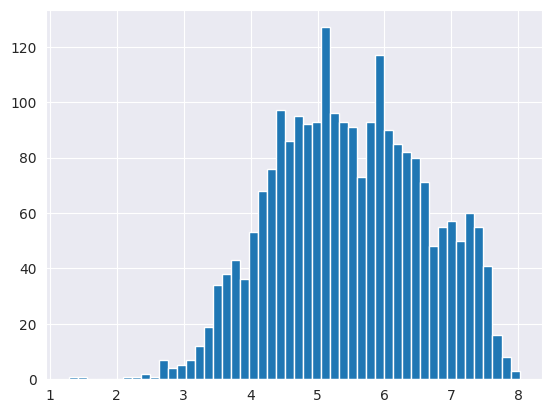

In [20]:
### [시각화]를 해서 살펴봅니다. 데이터의 분포를 파악할때, 시각화를 추천합니다.

### .hist(): 히스토그램을 의미합니다.
### bins=50:주머니가 50개임을 의미합니다. x가 50개의 그룹으로 나누어 진다라고 이해하셔도 좋습니다.
### x 축은 행복지수 값을 의미합니다.
### y축은 frequency 빈도수입니다.

df['Life Ladder'].hist(bins=50)

In [21]:
###5-6사이의 분포와 빈도가 가장 많음을 알 수 있다. 극단의 행복지수는 적은것을 알 수 있다.

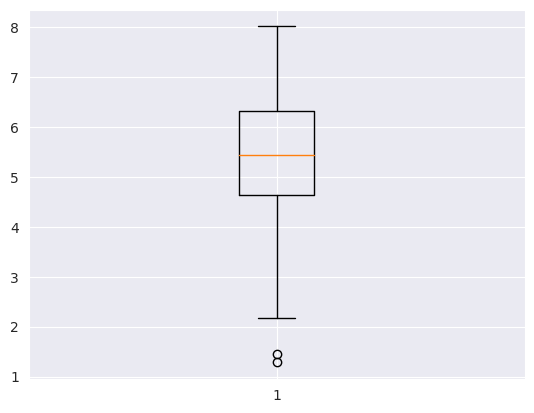

In [22]:
## 분포를 보는 또 다른 시각화 방법이 있습니다.
### boxplot 입니다.
### 언제 사용하면 좋을까요? 중간값을 볼때 편리합니다.
plt.boxplot(df['Life Ladder'])
plt.show()

In [23]:
### 해석) 5.5정도의 행복지수가 전체의 중간값임을 예상할 수 있다. 또한 4.8~6.3의 수치가 25%에서 75%의 비중을 차지함을 알 수 있다.

###[3-3]: 설명 변수 (독립변수/특징변수/속성)탐색


<ipython-input-24-4ea40ebb75cb>:14: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numerical_columns].hist(ax=ax)


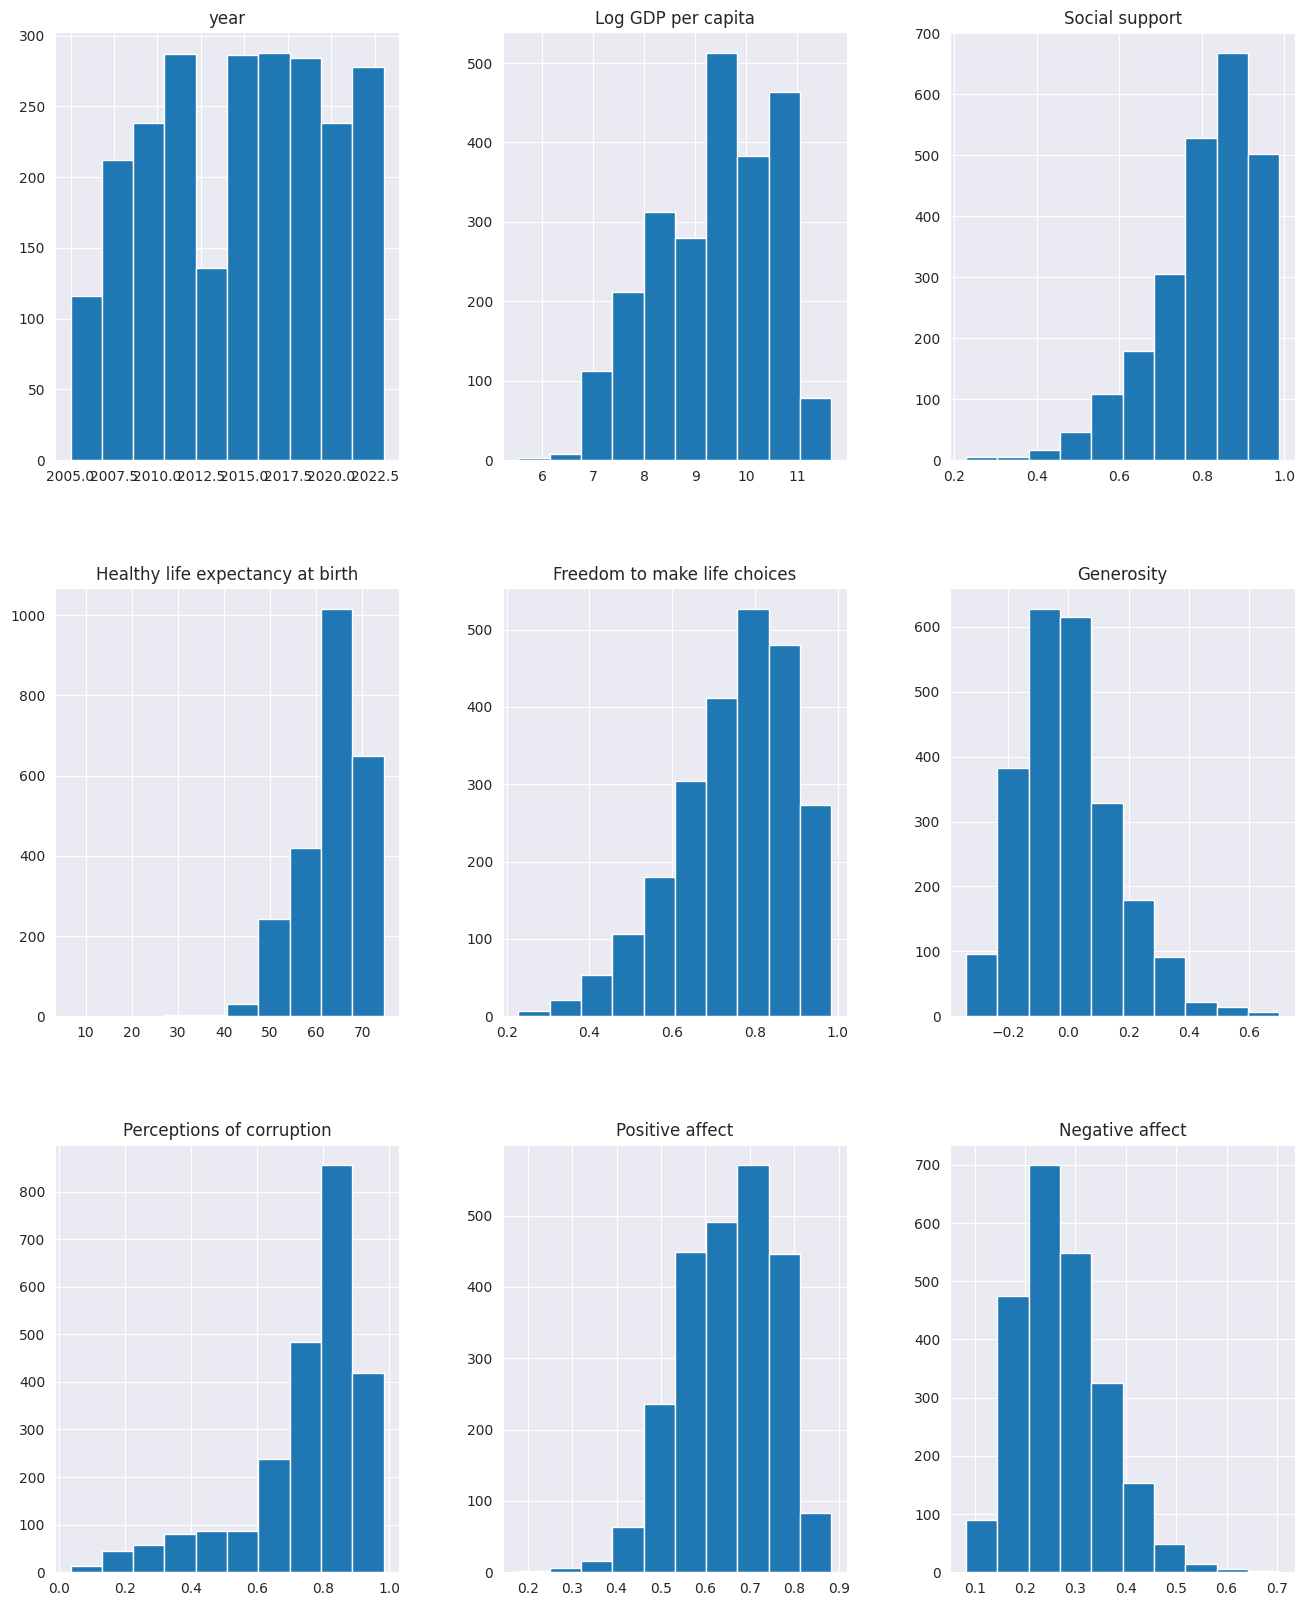

In [24]:
### numerical features(except "Country name") : Country name: 나라이름에 해당됨(문자형변수)제외
numerical_columns=[ 'year', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']

### figsize()는 plot()의 기본 크기를 지정합니다.
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

### gca()
### gca()로 현재의 Axes로 현재의 Figure 객체를 구할 수 있다.

df[numerical_columns].hist(ax=ax)
plt.show()

###[3-4]: 설명변수와 종속변수 간의 관계 탐색
모든 변수들 간의 관계를 탐색합니다.

In [25]:
### Pearson 상관계수 : 대표적으로 상관관계 분석시 사용하는 지표입니다.
### -1 에서 1 사이의 값을 가진다는 특징이 있습니다.
### 1일 때는 완전 양의 상관(perfect positive correlation),
### -1일 때는 완전 음의 상관관계(perfect negative correlation)관계를 보입니다.
### https://m.blog.naver.com/istech7/50153047118

cols = [ 'year','Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']

corr = df[cols].corr(method = 'pearson')
corr

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.046840,0.080054,-0.043724,0.165647,0.230089,0.032524,-0.079989,0.012357,0.207343
Life Ladder,0.046840,1.000000,0.773571,0.721254,0.710454,0.536127,0.171929,-0.418508,0.513382,-0.351603
Log GDP per capita,0.080054,0.773571,1.000000,0.674074,0.808468,0.356481,-0.002771,-0.334384,0.227044,-0.255284
Social support,-0.043724,0.721254,0.674074,1.000000,0.595955,0.403227,0.062626,-0.214998,0.423375,-0.454717
Healthy life expectancy at birth,0.165647,0.710454,0.808468,0.595955,1.000000,0.365932,0.015262,-0.290612,0.212429,-0.149991
Freedom to make life choices,0.230089,0.536127,0.356481,0.403227,0.365932,1.000000,0.313133,-0.448725,0.576221,-0.277016
Generosity,0.032524,0.171929,-0.002771,0.062626,0.015262,0.313133,1.000000,-0.260489,0.294739,-0.069404
Perceptions of corruption,-0.079989,-0.418508,-0.334384,-0.214998,-0.290612,-0.448725,-0.260489,1.000000,-0.269531,0.256930
Positive affect,0.012357,0.513382,0.227044,0.423375,0.212429,0.576221,0.294739,-0.269531,1.000000,-0.333067
Negative affect,0.207343,-0.351603,-0.255284,-0.454717,-0.149991,-0.277016,-0.069404,0.256930,-0.333067,1.000000


In [26]:
#LIfe Ladder와 가장 큰 상관관계를 가지는 변수는 Log GDP per capital 이다.

###[Correlation: 상관관계] 를 직관적으로 살펴보기 위해 Heatmap 으로 돌려봅니다.


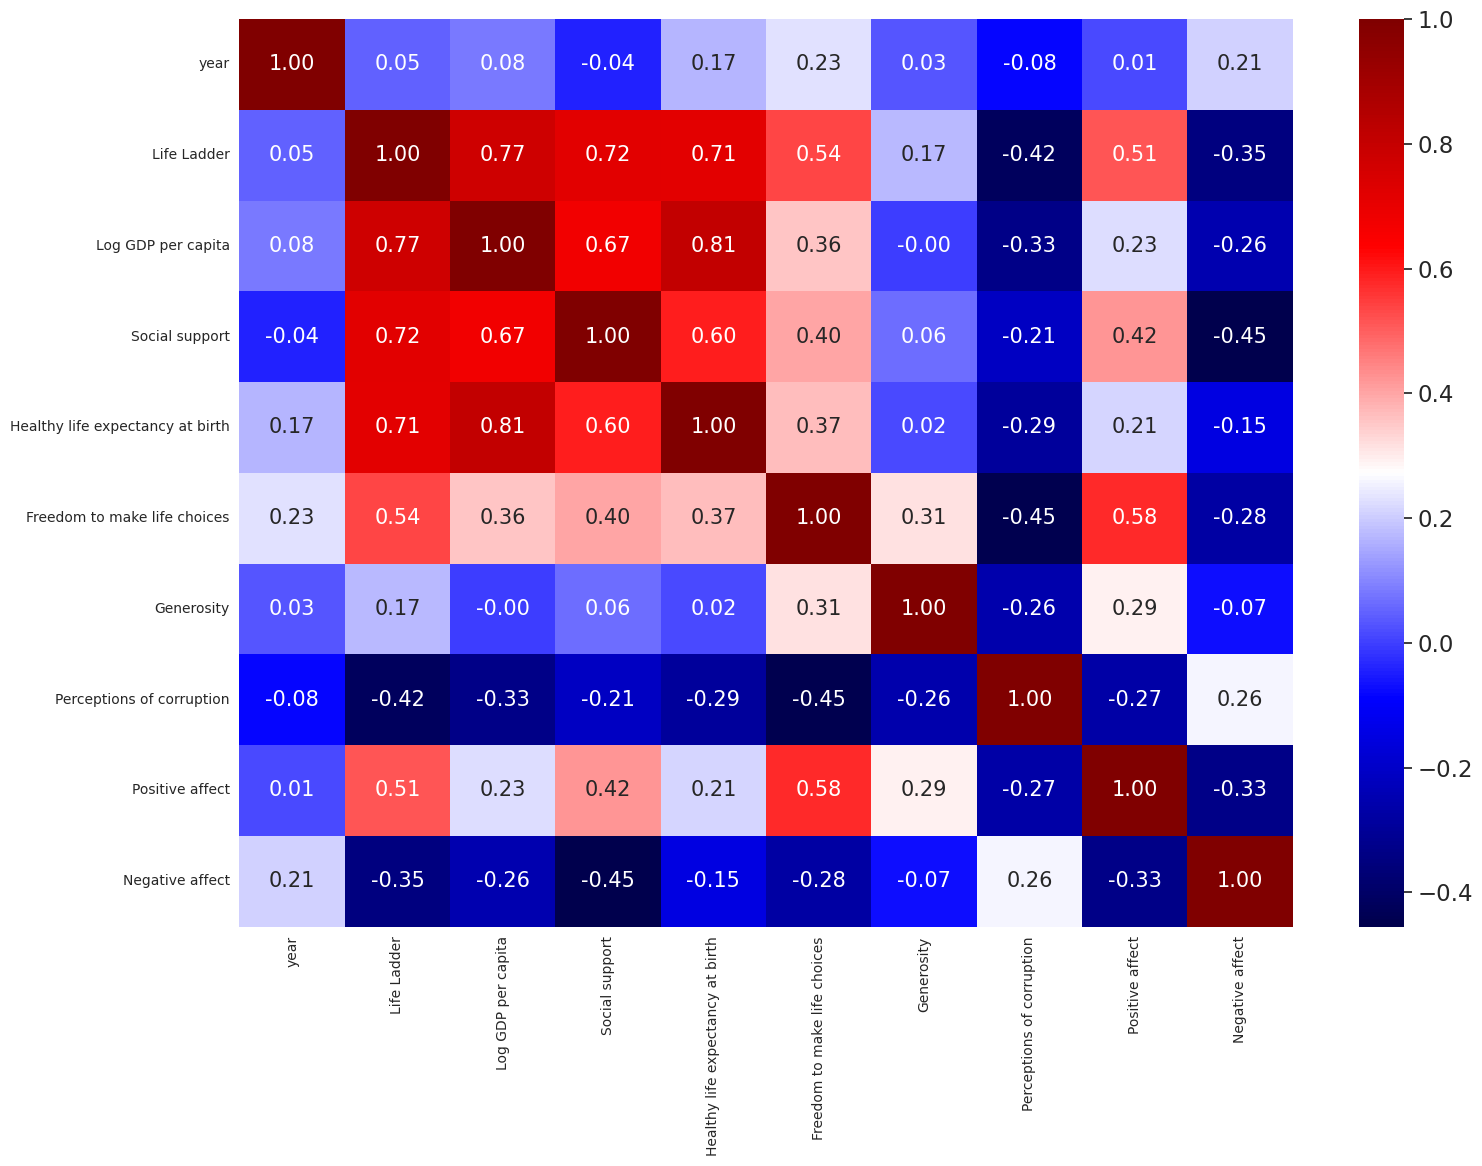

In [27]:
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "seismic")
plt.tight_layout() ## 여백을 조정합니다.
### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
plt.show() ## 화면에 출력합니다.

In [28]:
### 해설) 우리의 관심사인 target variable  “Life Ladder(행복지수)”과 다른 변수간의 상관관계를 살펴봅니다.
###  "Log GDP per capital- 1인당 GDP값”(0.77) (양의 상관관계)
### “Perceptions of corruption - 부정부패 정도”(-0.42) (음의 상관관계)
### 와 상관관계를 보이고 있다는 것을 알 수 있습니다.

###[3-4-1] 설명변수(x) 와 종속변수(y) 간의 관계 탐색(1) Life Ladder - 행복지수~ 1인당 GDP의 로그 값("Log GDP per capital")의 관계

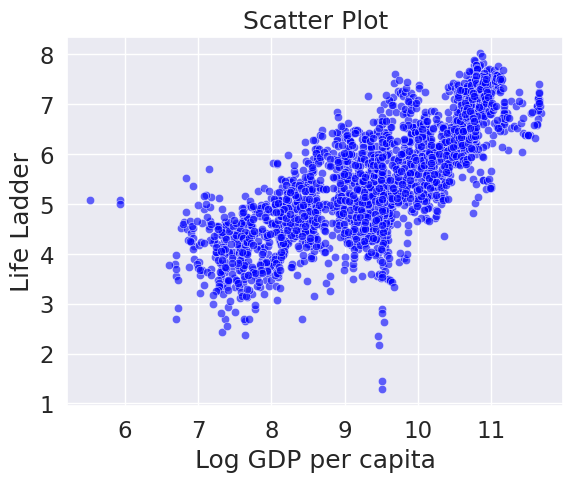

In [30]:
sns.scatterplot(data=df, x='Log GDP per capita', y='Life Ladder', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [31]:
### 해설) 행복지수값이 1인당 GDP값과 깅한 양의 상관관계(positive correlation)를 갖고 있습니다.
### 경제적으로 여유로울수록 높은 행복지수를 나타내고 있습니다.

###[3-4-2] 설명변수(x) 와 종속변수(y) 간의 관계 탐색(2)  Life Ladder - 행복지수~ 부패에 대한 인식("Perceptions of corruption")의 관계

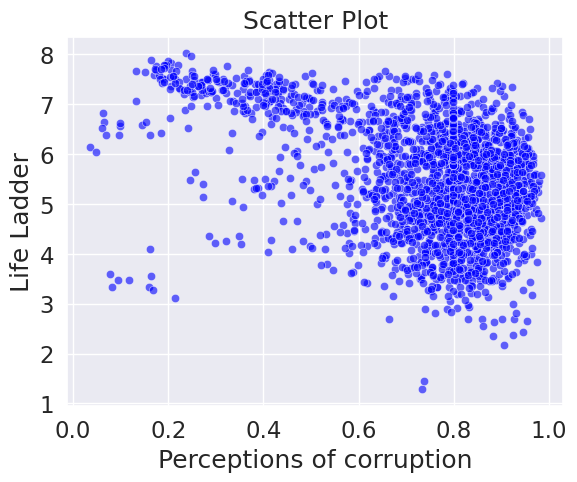

In [32]:
sns.scatterplot(data=df, x='Perceptions of corruption', y='Life Ladder', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [33]:
### 해설) 행복지수값이 부정부패 정도와 음의 상관관계(negative correlation)를 갖고 있습니다.
### 부정부패정도가 높을수록 행복지수가 낮은 경향이 있습니다.

###+설명변수(x) 와 종속변수(y) 간의 관계 탐색(3)Life Ladder - 행복지수~연도("year")의 관계

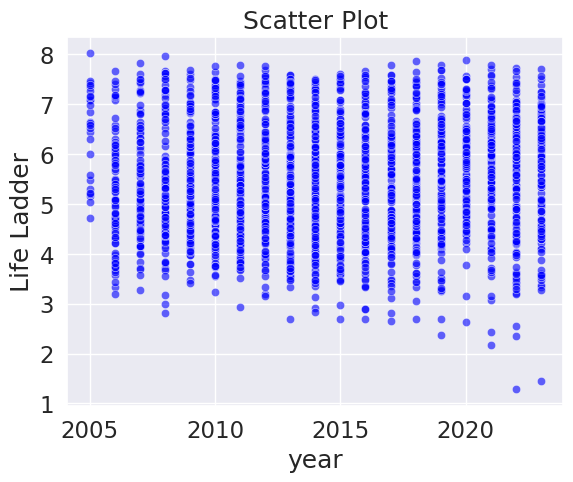

In [35]:
sns.scatterplot(data=df, x='year', y='Life Ladder', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [36]:
###year컬럼은 행복지수와의 상관관계가 없음- 고려할 필요성X

###[3-4-3] 나라별 차이 탐색




*   나라별로 행복지수가 차이가 있다면 그 이유가 어떤 요인 때문일지 탐색



In [38]:
df['Country name'].value_counts()

Country name
Lebanon      18
Jordan       18
Nicaragua    18
Nepal        18
Moldova      18
             ..
Cuba          1
Suriname      1
Guyana        1
Oman          1
Maldives      1
Name: count, Length: 165, dtype: int64

In [39]:
### 해설) 이 데이터안에는 155개의 나라가 있니다.

<Axes: >

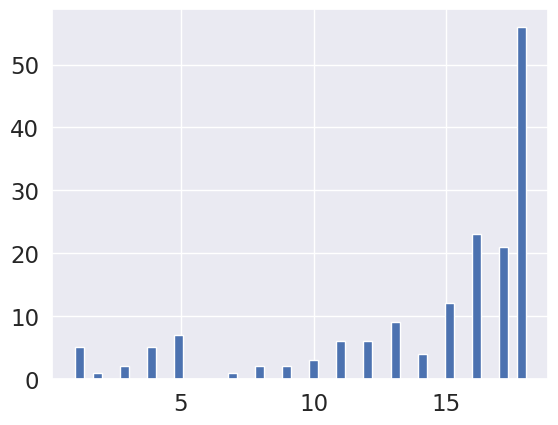

In [40]:
### 도시에 해당하는 데이터 갯수 살펴보기 (bar plot)을 활용해서 시각화를 합니다.
### 위의 각 나라 데이터 갯수를 x 축으로 합니다.

df['Country name'].value_counts().hist(bins=50)

###국가별로 행복지수를 비교해 행복지수 상위 국가를 파악한다.

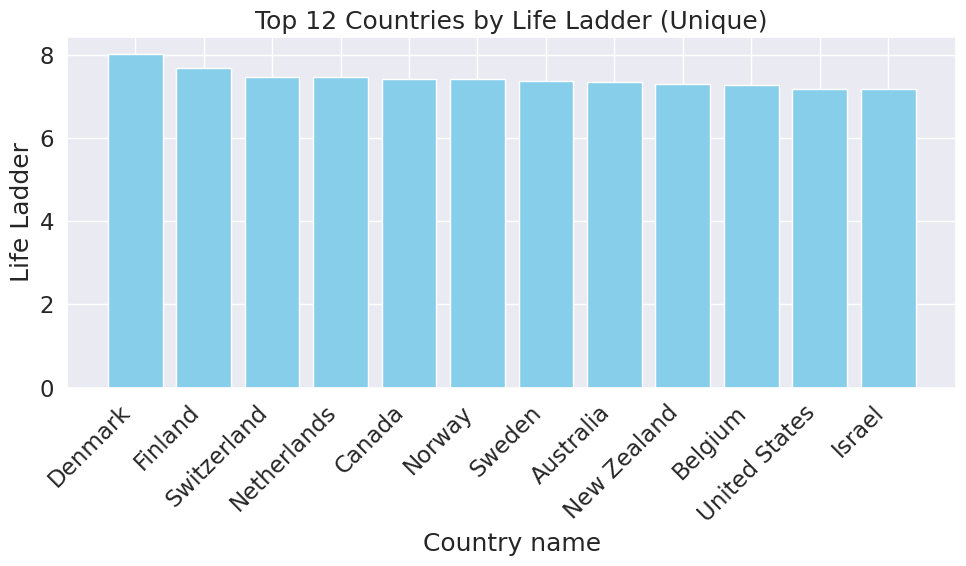

In [41]:
#나라별 행복지수가 높은 국가 12개를 확인한다.
import matplotlib.pyplot as plt

# 중복된 국가를 제거합니다.
df_unique = df.drop_duplicates(subset=['Country name'])

# 행복지수를 기준으로 데이터프레임을 정렬합니다.
df_sorted = df_unique.sort_values(by='Life Ladder', ascending=False)

# 상위 12개 국가를 선택합니다.
top_countries = df_sorted.head(12)

# 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country name'], top_countries['Life Ladder'], color='skyblue')
plt.xlabel('Country name')
plt.ylabel('Life Ladder')
plt.title('Top 12 Countries by Life Ladder (Unique)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [42]:
#행복지수 상위12개 국가
top_countries

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
539,Denmark,2005,8.018934,10.849012,0.972372,68.300003,0.971135,-0.021613,0.236522,0.776689,0.153672
665,Finland,2006,7.672449,10.745317,0.964563,68.720001,0.968580,-0.010572,0.132430,0.682819,0.172134
2005,Switzerland,2006,7.473253,11.055938,0.951352,71.160004,0.918958,0.283896,0.407931,0.742094,0.211929
1482,Netherlands,2005,7.463979,10.809070,0.947358,70.699997,0.901008,-0.021613,0.571342,0.700739,0.232795
349,Canada,2005,7.418048,10.707299,0.961552,70.500000,0.957306,0.246243,0.502681,0.783299,0.233278
1582,Norway,2006,7.415682,11.055703,0.958511,69.400002,0.959533,0.100618,0.397150,0.766967,0.197113
1987,Sweden,2005,7.376316,10.724154,0.951470,71.000000,0.964395,-0.021613,0.798497,0.742480,0.150766
81,Australia,2005,7.340688,10.662058,0.967892,69.800003,0.934973,-0.021613,0.390416,0.769770,0.238012
1499,New Zealand,2006,7.305014,10.541117,0.946047,69.720001,0.932080,0.304418,0.224220,0.824703,0.218773
174,Belgium,2005,7.262290,10.743808,0.934875,68.400002,0.923843,-0.021613,0.597554,0.676886,0.260380


<Axes: xlabel='Life Ladder', ylabel='Country name'>

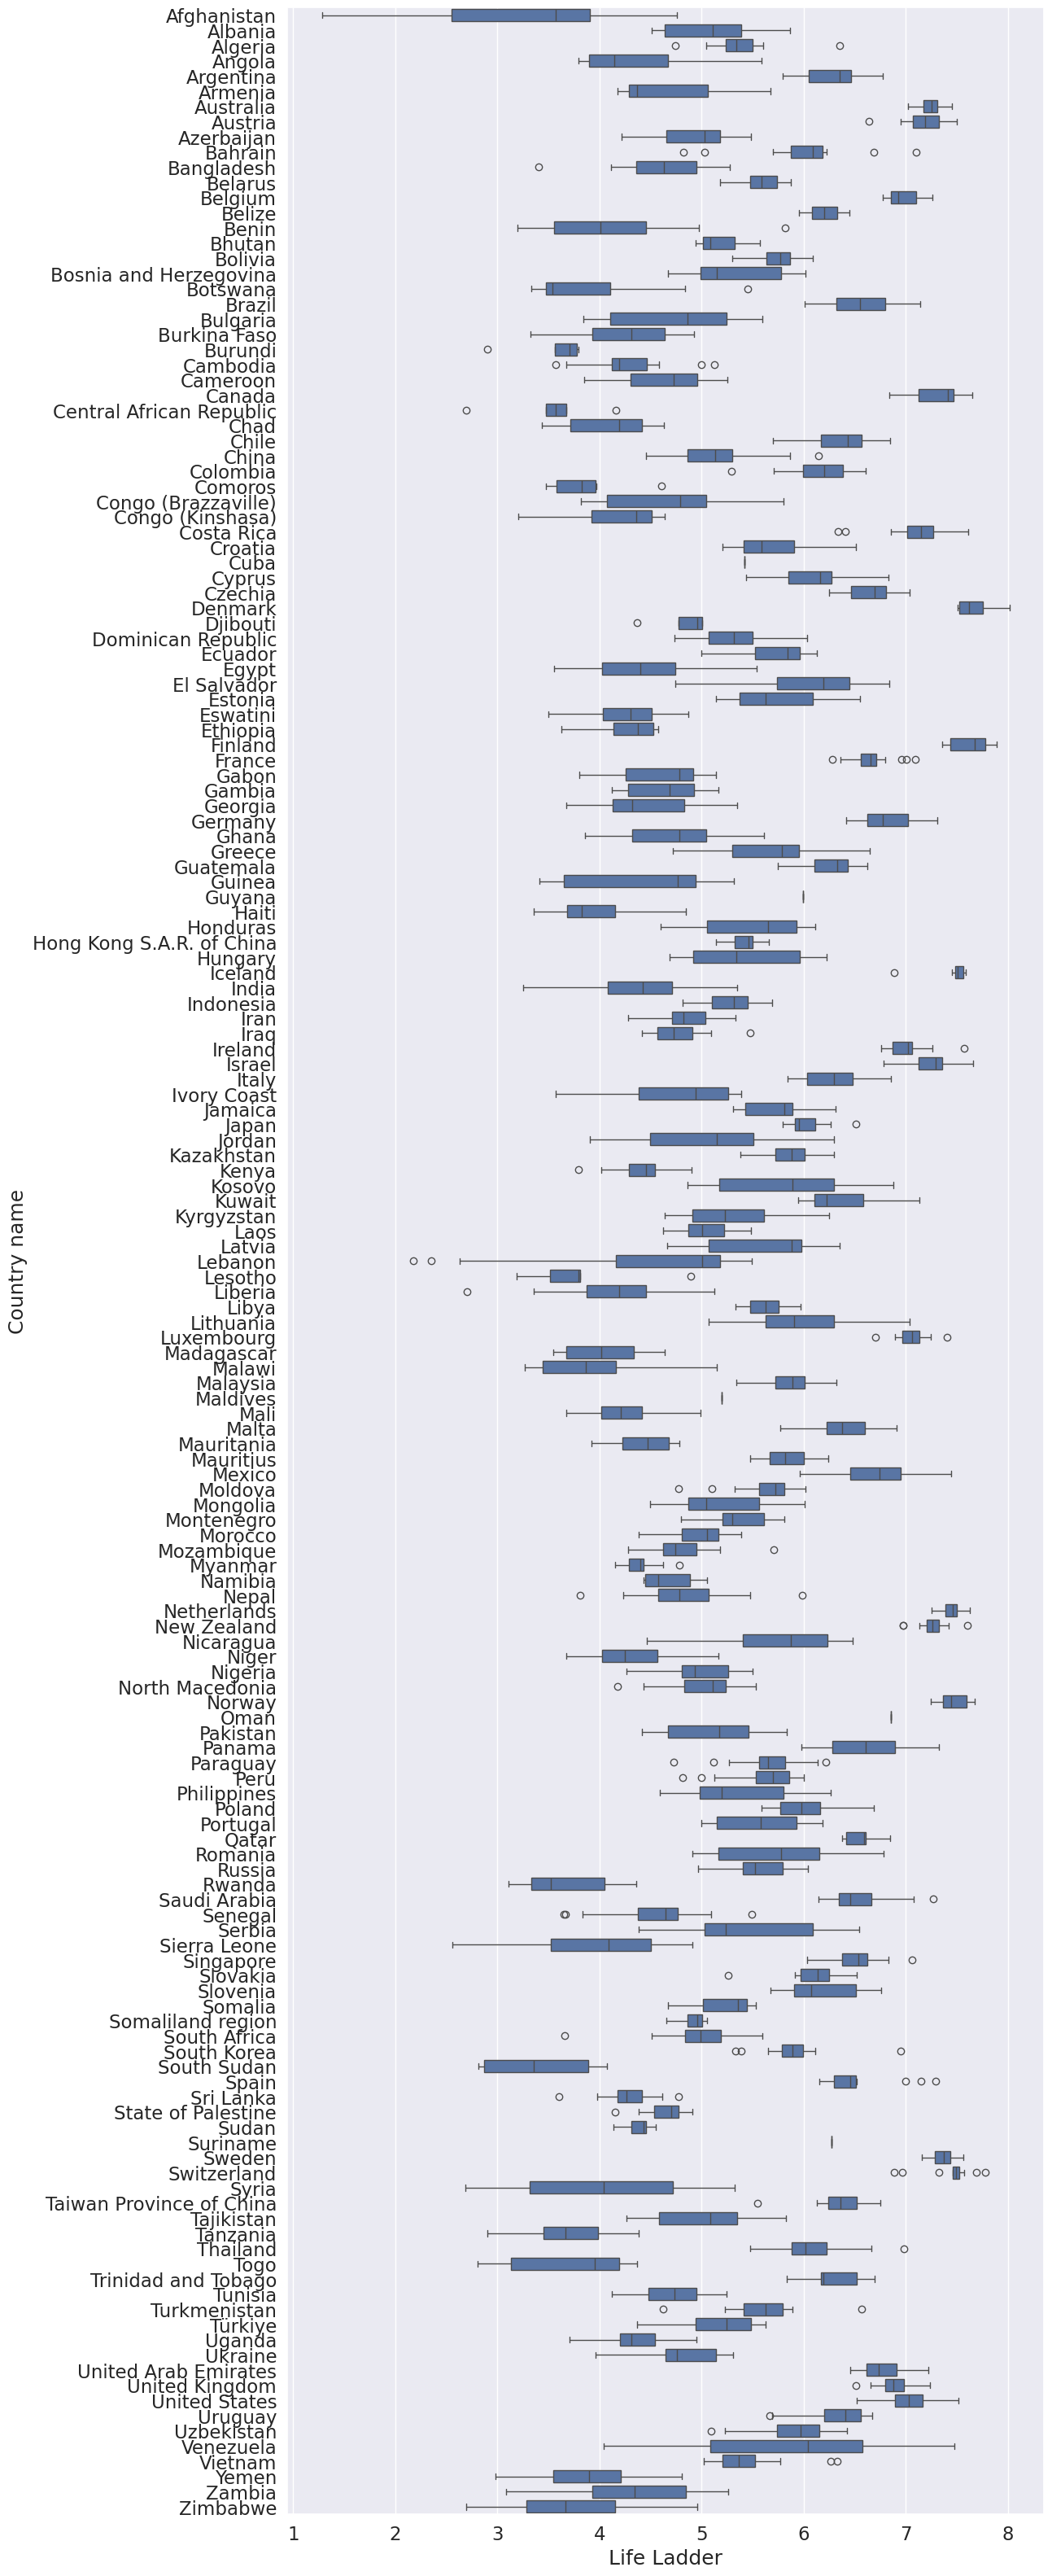

In [43]:
### 나라별 행복지수 특징 (boxplot 이용)
fig = plt.figure(figsize = (12, 40))
sns.boxplot(x='Life Ladder', y='Country name', data=df)

In [44]:
### 덴마크, 아이슬란드,노르웨이,필란드등이 눈에 띄게 높은 수치를 보임
### *아프가니스탄,레바논은 행복수치가 눈에 띄게 낮음

<Axes: xlabel='Log GDP per capita', ylabel='Country name'>

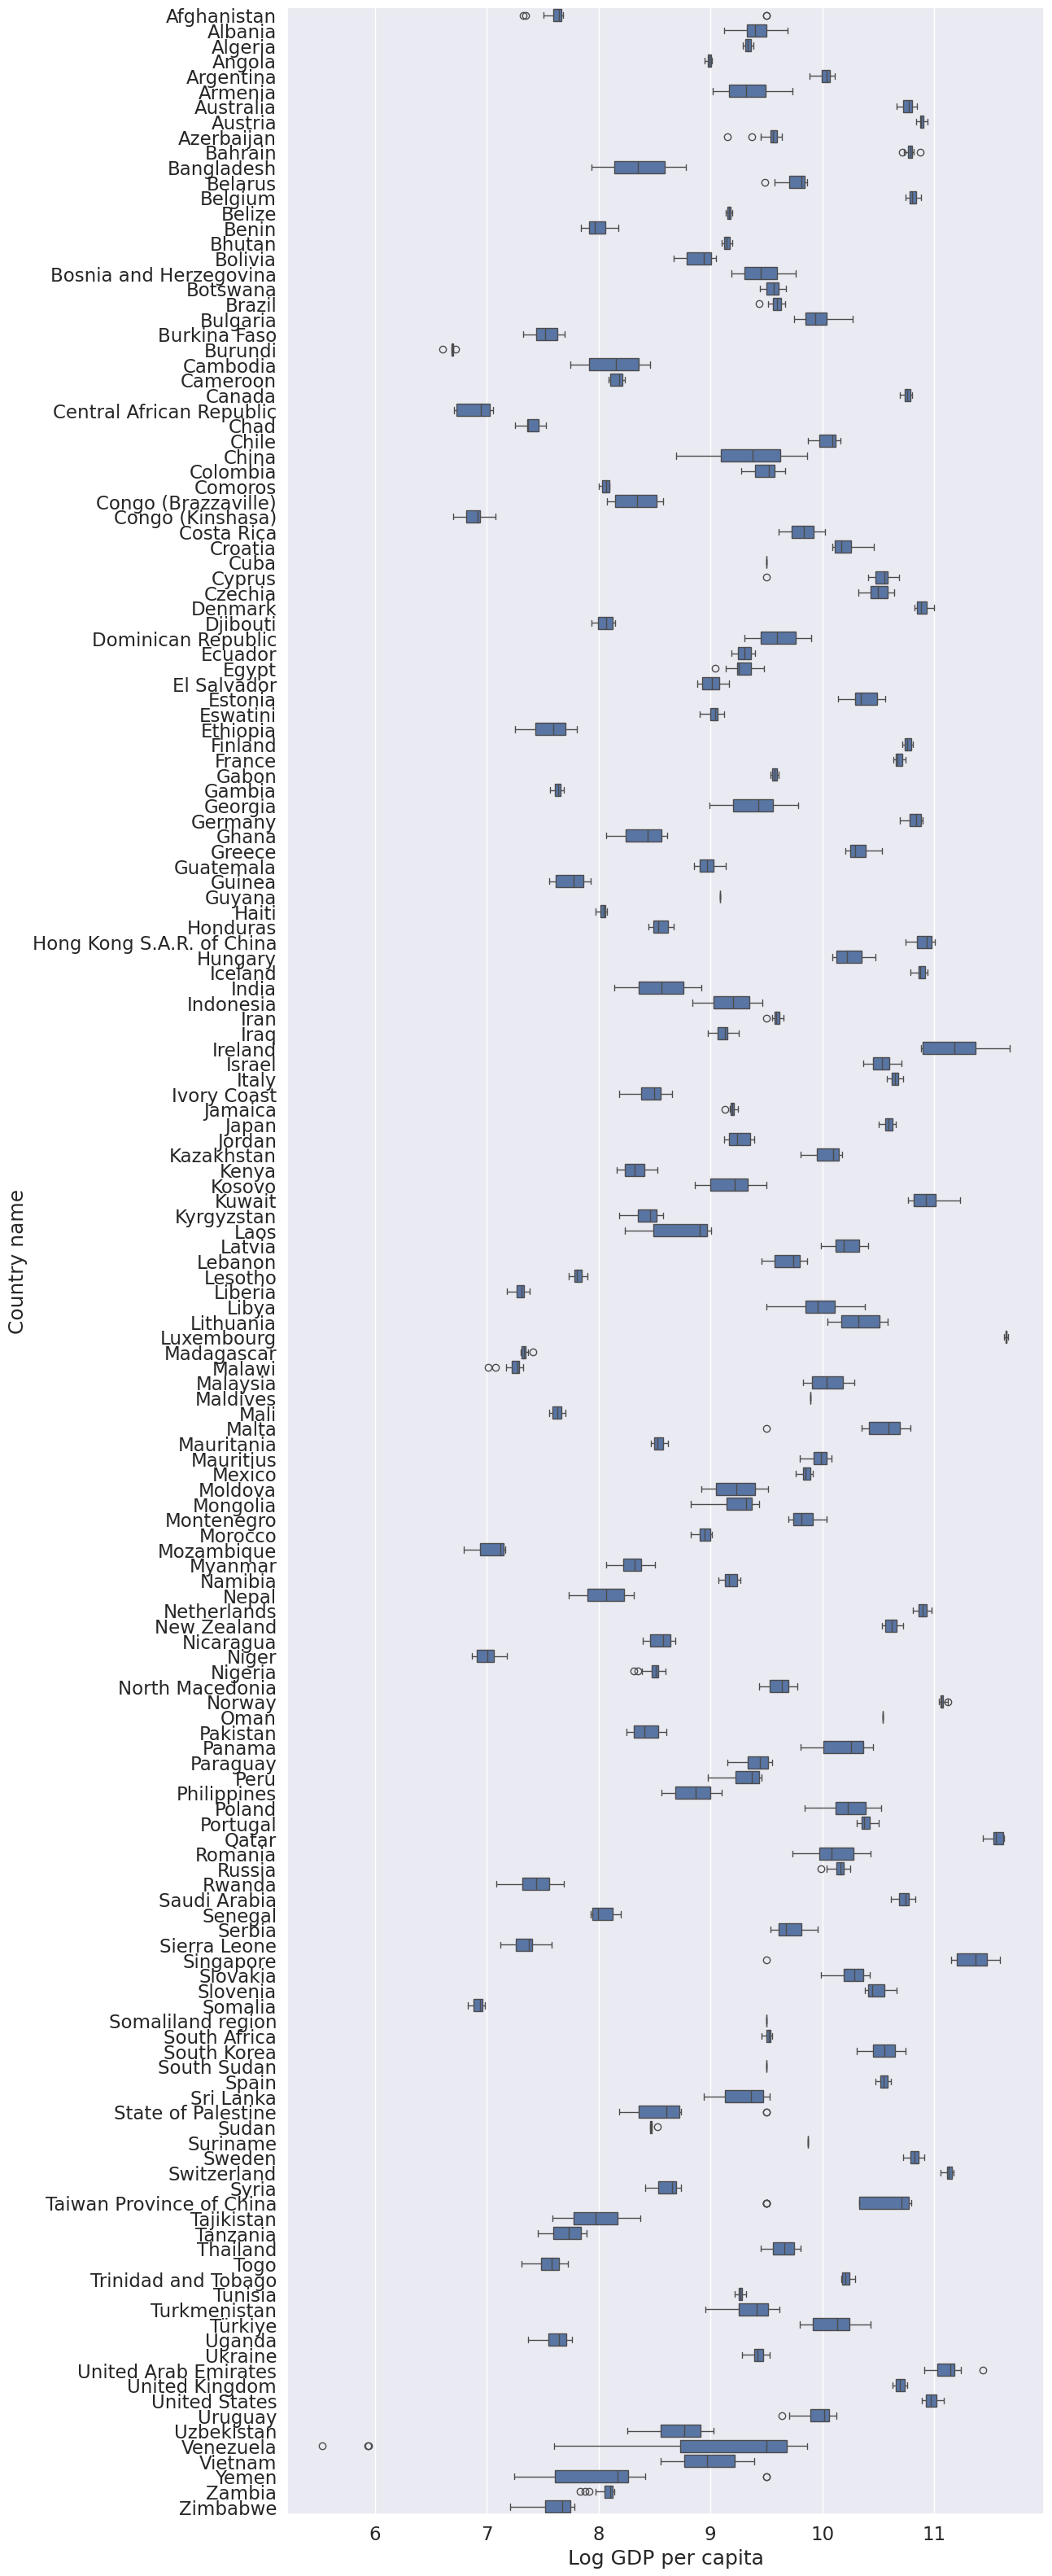

In [45]:
### 나라별 1인당 GDP값의 특징 (boxplot 이용)
fig = plt.figure(figsize = (12, 40))
sns.boxplot(x='Log GDP per capita', y='Country name', data=df)

<Axes: xlabel='Perceptions of corruption', ylabel='Country name'>

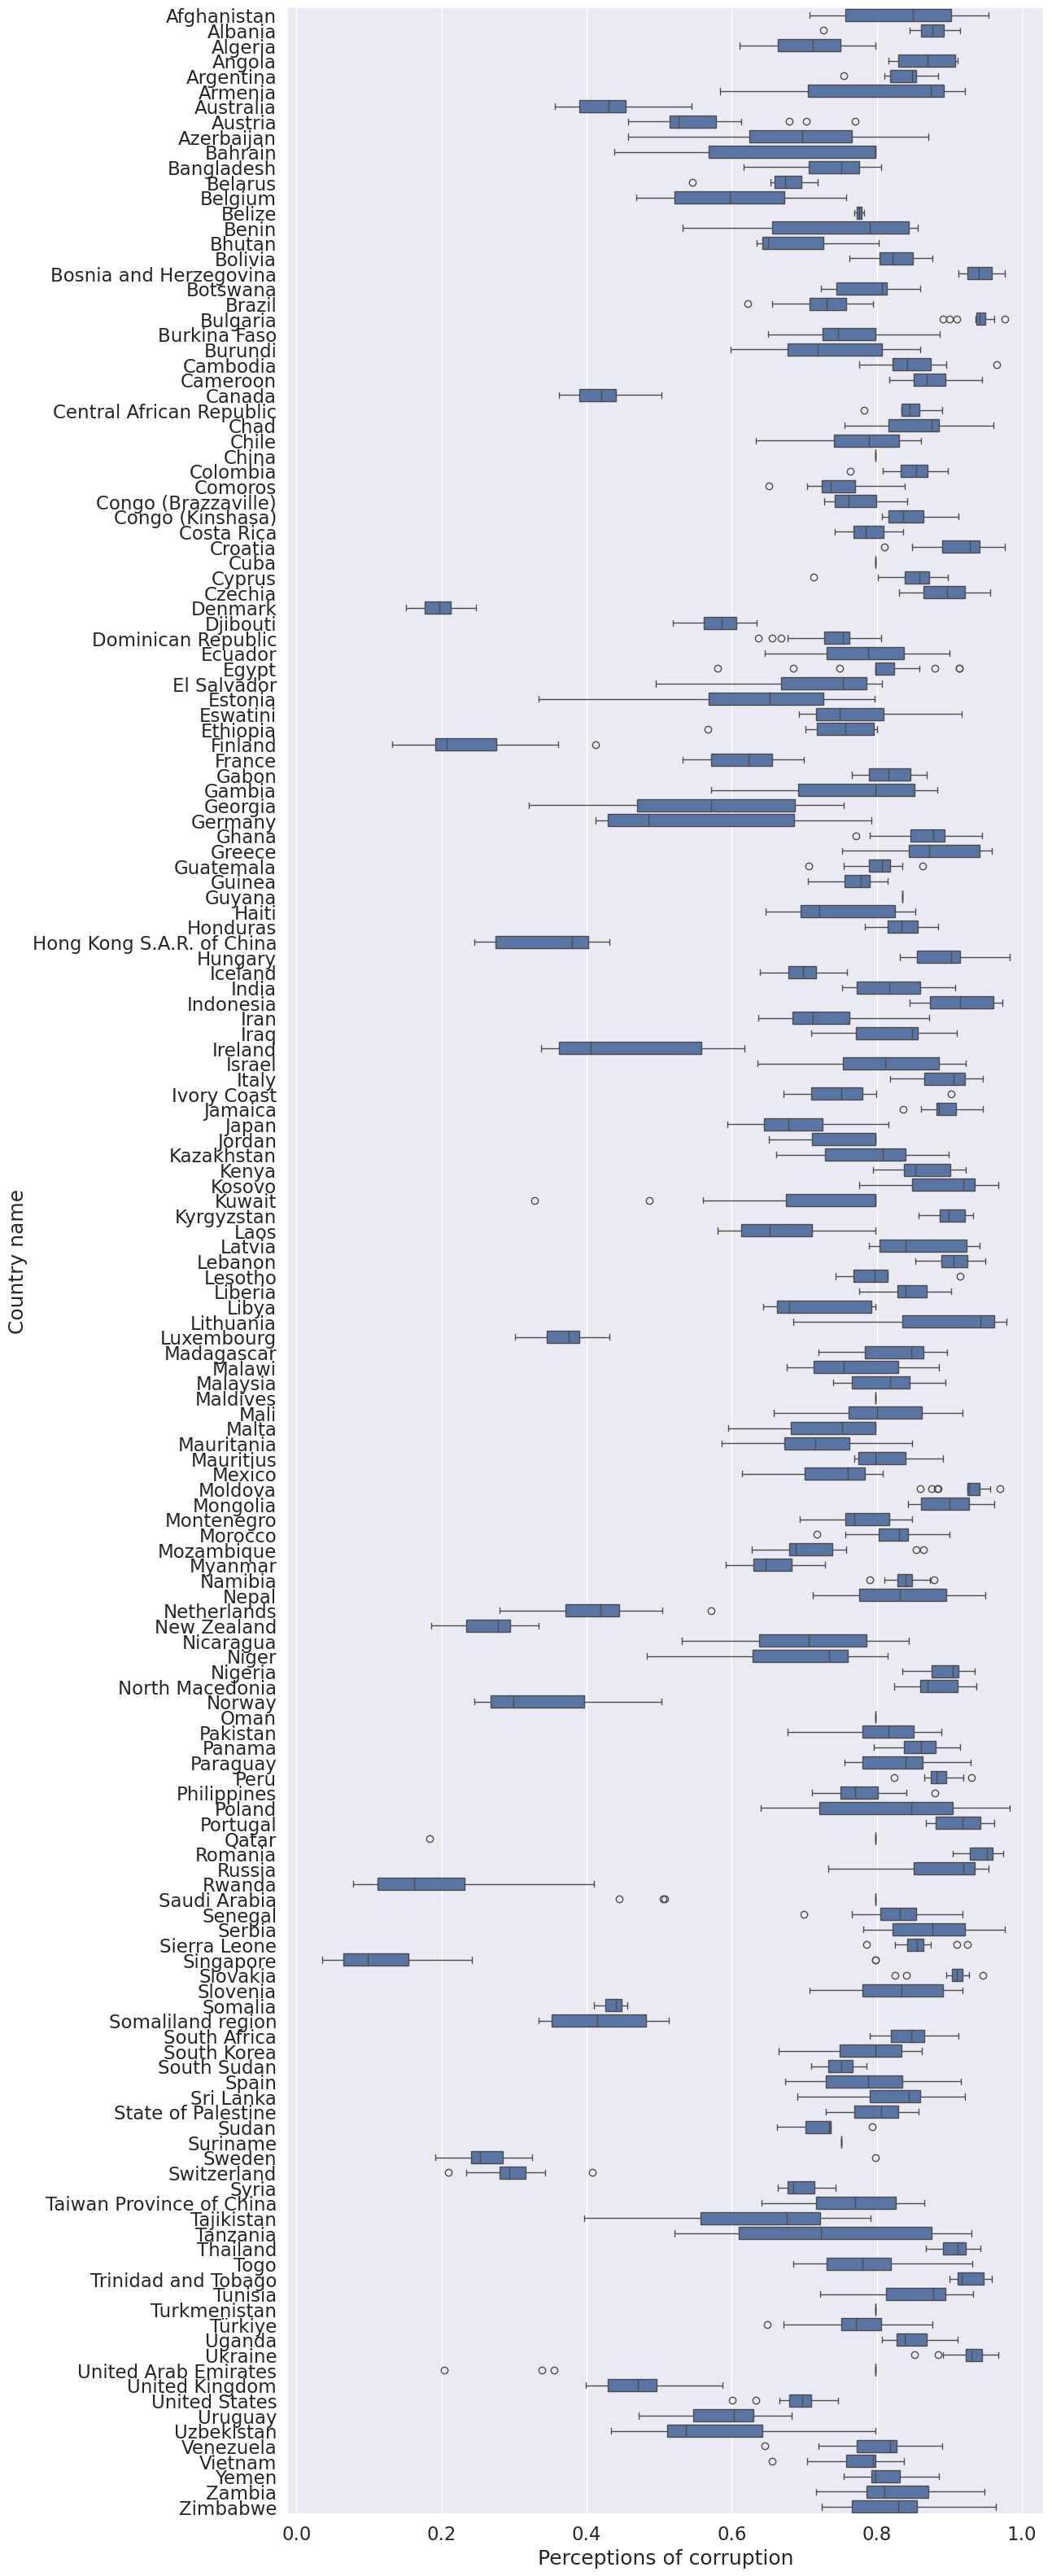

In [46]:
### 나라별 부패에 대한 인식을 확인해 보겠습니다.

fig = plt.figure(figsize = (12, 40))
sns.boxplot(x='Perceptions of corruption', y='Country name', data=df)

In [47]:
### 싱가폴, 필란드, 덴마크의 부패에대한인식이 낮음
## 부패에 대한 인식이 낮을경우 행복지수가 높은것은 아니기에 비례한다고 보기는 무리가 있음

###[4]: 모델링 하기 (Modeling)

*   이제 주어진 가공된 독립변수들을 활용하여 행복지수에 가장 큰 영향을 미치는 요인을 예측하는 회귀 모델을 만들어 보겠습니다.




In [49]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2363 non-null   float64
 4   Social support                    2363 non-null   float64
 5   Healthy life expectancy at birth  2363 non-null   float64
 6   Freedom to make life choices      2363 non-null   float64
 7   Generosity                        2363 non-null   float64
 8   Perceptions of corruption         2363 non-null   float64
 9   Positive affect                   2363 non-null   float64
 10  Negative affect                   2363 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


###[4-1]: 데이터 전처리
먼저 특징(Feature)들의 범주(scale) 차이를 없애기 위해 수치형 변수(특징, 속성, 독립변수)에 대해서 표준화를 진행합니다.
문자형 변수인 "Country name"을 제외한 모든 수치형 변수에 대해서 표준화를 진행합니다.

**[Scaler]**


In [51]:
### 사이킷런은 파이썬에서 머신러닝 분석을 할 때 유용하게 사용할 수 있는 라이브러리 입니다.
### 여러가지 머신러닝 모듈로 구성되어있습니다.

from sklearn.preprocessing import StandardScaler

### feature standardization  (numerical_columns except dummy var.-"CHAS", 종속변수 "CMEDV", 위도 경도("LON, LAT"))

scaler = StandardScaler()  # 평균 0, 분산 1
scale_columns = ['year', 'Log GDP per capita','Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [52]:
df.head() # Original Table

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,-1.337163,3.723590,-1.790772,-2.968964,-1.916702,-0.234959,1.038416,0.747924,-2.248971,-0.171495
1,Afghanistan,-1.139471,4.401778,-1.652583,-2.127977,-1.872290,-0.518543,1.184948,0.572367,-1.613876,-0.414551
2,Afghanistan,-0.941778,4.758381,-1.560661,-2.237464,-1.827878,-1.088121,0.747171,-0.222300,-1.278134,0.025781
3,Afghanistan,-0.744086,3.831719,-1.589168,-2.386156,-1.783465,-1.841775,1.013470,-0.087280,-1.628889,-0.068077
4,Afghanistan,-0.546394,3.782938,-1.519958,-2.390018,-1.739053,-1.588448,1.480392,0.159609,-0.364098,-0.059502


In [53]:
df[scale_columns].head() # Scaler 적용 후, Table

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,-1.337163,-1.790772,-2.968964,-1.916702,-0.234959,1.038416,0.747924,-2.248971,-0.171495
1,-1.139471,-1.652583,-2.127977,-1.872290,-0.518543,1.184948,0.572367,-1.613876,-0.414551
2,-0.941778,-1.560661,-2.237464,-1.827878,-1.088121,0.747171,-0.222300,-1.278134,0.025781
3,-0.744086,-1.589168,-2.386156,-1.783465,-1.841775,1.013470,-0.087280,-1.628889,-0.068077
4,-0.546394,-1.519958,-2.390018,-1.739053,-1.588448,1.480392,0.159609,-0.364098,-0.059502


In [54]:
df[numerical_columns].head()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,-1.337163,-1.790772,-2.968964,-1.916702,-0.234959,1.038416,0.747924,-2.248971,-0.171495
1,-1.139471,-1.652583,-2.127977,-1.872290,-0.518543,1.184948,0.572367,-1.613876,-0.414551
2,-0.941778,-1.560661,-2.237464,-1.827878,-1.088121,0.747171,-0.222300,-1.278134,0.025781
3,-0.744086,-1.589168,-2.386156,-1.783465,-1.841775,1.013470,-0.087280,-1.628889,-0.068077
4,-0.546394,-1.519958,-2.390018,-1.739053,-1.588448,1.480392,0.159609,-0.364098,-0.059502


##**[Data Setting] training/test set 나누기**

*   학습 후 도출될 예측 모델의 예측 성능을 평가하기 위해, 먼저 전체 데이터셋을
"Training set"과 "Test set"으로 나눕니다.
* Training set에서 모델을 학습하고 Test set에서 모델의 예측 성능을 검증합니다.




In [55]:
from sklearn.model_selection import train_test_split

# split dataset into training & test
X = df[numerical_columns]
y = df['Life Ladder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [56]:
X_train.shape, y_train.shape

((1654, 9), (1654,))

In [57]:
X_test.shape, y_test.shape

((709, 9), (709,))

In [ ]:
y_train
### Life Ladder 값을 의미합니다.

In [59]:
X_train

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2339,0.639760,-1.101952,-0.759412,-1.402260,0.289371,0.286876,0.354360,0.099245,0.896958
1222,-1.139471,0.563461,1.018507,0.096655,-1.841382,-1.942543,1.286582,-1.199462,-0.025886
575,1.035145,0.285021,-0.028041,0.111459,0.607657,-0.804106,-0.614169,0.678132,0.470411
2055,1.035145,-1.046162,-0.163507,-0.192024,0.148336,-0.339354,-1.093013,-0.000956,0.818621
1509,0.442068,1.091147,1.203107,0.977500,1.385975,1.813047,-2.911758,1.048550,-1.167521
...,...,...,...,...,...,...,...,...,...
960,-0.348701,1.305608,1.205322,1.038196,0.962909,2.050002,-1.045268,0.870517,-0.320390
905,-1.732548,-0.490505,-0.319000,-0.462939,-0.270703,2.165234,0.933370,0.599912,-0.086936
1096,1.035145,-0.864304,-1.123476,-0.791591,-0.351232,1.588933,0.497380,0.815945,0.275212
235,-0.151009,-0.024317,-0.180822,0.525974,-2.448917,1.447479,1.272934,-1.524813,-0.125658


#**[다중공산성 1] VIF: Variance Inflation Factor**

*   회귀 분석에서 하나의 독립 변수가 다른 독립 변수와의 상관 관계가 높으면(다중공선성이 존재하면) 회귀 분석 모델링 결과에 부정적인 영향을 미칠 수 있기 때문에, 모델링을 진행하기 앞서 다중공선성의 존재여부를 확인해야합니다.

*  보통 다중공선성을 판단할 때 VIF(Variance Inflation Factors)값을 확인합니다.



    1.   일반적으로 VIF>10인 독립변수들은 다른 변수와의 상관관계가 높음을 의미합니다.

    2.  다중공선성이 존재함을 의미합니다. 해당 변수는 모델링에서 고려하지 않는 것이 좋습니다.



In [60]:
### 결측값 및 무한값 처리
# 결측값 확인
print(df.isnull().sum())

# 무한값 확인
print(np.isinf(X_train).sum())

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64
year                                0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)
### 소수점 첫째자리까지 표시합니다. 즉, 소수점 둘째짜리에서 반올림 합니다.
### for i in range(X_train.shape[1]) : train data의 열이 존재하는 동안 반복합니다. 여기서는 13번을 반복하게 됩니다.

,features,VIF Factor
0,year,1.2
1,Log GDP per capita,3.5
2,Social support,2.5
3,Healthy life expectancy at birth,3.0
4,Freedom to make life choices,2.0
5,Generosity,1.2
6,Perceptions of corruption,1.4
7,Positive affect,1.8
8,Negative affect,1.5


In [76]:
### 해설) 모든 변수의 VIF(다중공선성) 이 10이하입니다. 다중공선성이 존재하지 않으므로, 모든 변수들 모델링 시 고려합니다.


#[4-2]: 회귀모델링
1.  먼저 Training set에서 선형 회귀 예측 모델을 학습합니다.
2.  도출된 모델을 Test set에 적용해 주택 가격(“Life Ladder”)을 예측합니다.
3.  실제 “Life Ladder” 값과 비교하여 모델의 예측 성능을 평가하는 데 활용하게 됩니다.

In [62]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

#[4-3]: 모델해석하기
각 설명변수 (특징변수, 속성, 독립변수, x, 열) 에 대한 회귀계수를 확인합니다.

In [63]:
### print coef
### 계수를 출력합니다.
print(lr.coef_)

[-0.04088536  0.40835128  0.24013843  0.22049434  0.08012517  0.05775941
 -0.10486597  0.23891989 -0.00986114]


In [64]:
### "feature - coefficients" DataFrame 만들기
### zip 키워드는 리스트 2개를 하나로 묶습니다.(결과는 튜플로 됩니다.)
coefs = pd.DataFrame(zip(df[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs

### https://m.blog.naver.com/tkdldjs35/221578915290 : zip

,feature,coefficients
0,year,-0.040885
1,Log GDP per capita,0.408351
2,Social support,0.240138
3,Healthy life expectancy at birth,0.220494
4,Freedom to make life choices,0.080125
5,Generosity,0.057759
6,Perceptions of corruption,-0.104866
7,Positive affect,0.238920
8,Negative affect,-0.009861


In [65]:
##year, Perceptions of corruption, Nagative affect는 음의 상관관계
## Log GDP per capita, Social support는 양의 상관관계 중 상대적으로 높은 수치를 보입니다.

In [66]:
### 크기 순서대로 나열합니다.
### 크기 순서로 나열 : 내림차순으로 합니다. 다만 양, 음을 가리지 않습니다. 절대값을 기준으로 합니다.
### 절대값 기준 함수: coefficients.abs().sort_values

coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
1,Log GDP per capita,0.408351
2,Social support,0.240138
7,Positive affect,0.238920
3,Healthy life expectancy at birth,0.220494
6,Perceptions of corruption,-0.104866
4,Freedom to make life choices,0.080125
5,Generosity,0.057759
0,year,-0.040885
8,Negative affect,-0.009861


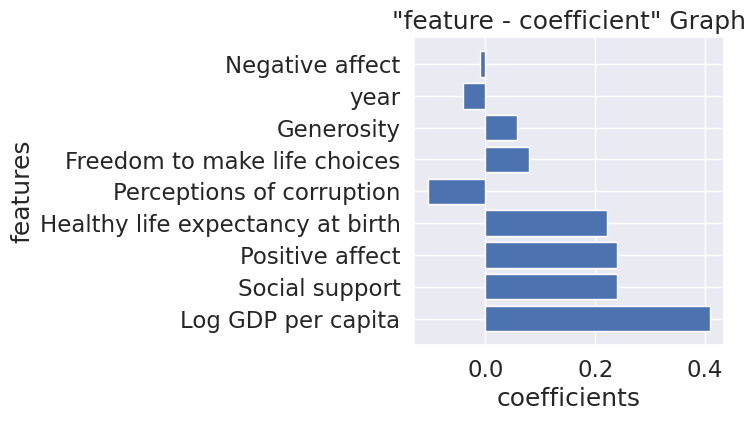

In [67]:
### coefficients 를 시각화 합니다.

### figure size
plt.figure(figsize = (4, 4))

### bar plot : matplotlib.pyplot 모듈의 barh() 함수를 사용해서 수평 막대 그래프를 그립니다.
plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

###[4-3] : 모델 해석

###[4-3-1: 유의성 검정] 을 합니다. 통계에서 변수가 유의하다는 의미입니다.

In [68]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
### 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업이라고 합니다.

### ordinary least square 의 약자로, 거리의 최소값을 기준으로 구하는 함수입니다.
model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     595.7
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:27:03   Log-Likelihood:                -1341.4
No. Observations:                1654   AIC:                             2703.
Df Residuals:                    1644   BIC:                             2757.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                5.4719      0.013    407.148      0.000       5.446       5.498
year                                -0.0409      0.015     -2.809      0.005      -0.069      -0.012
Log GDP per capita                   0.4084      0.025     16.303      0.000       0.359       0.457
Social support                       0.2401      0.021     11.214      0.000       0.198       0.282
Healthy life expectancy at birth     0.2205      0.023      9.430      0.000       0.175       0.266
Freedom to make life choices         0.0801      0.019      4.236      0.000       0.043       0.117
Generosity                           0.0578      0.015      3.919      0.000       0.029       0.087
Perceptions of corruption           -0.1049      0.016     -6.501      0.000      -0.137      -0.073
Positive affect                      0.2389      0.018     13.564      0.000       0.204       0.273
Negative affect                     -0.0099      0.016     -0.611      0.541      -0.042       0.022
==============================================================================
Omnibus:                       43.189   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.441
Skew:                          -0.272   Prob(JB):                     4.55e-14
Kurtosis:                       3.771   Cond. No.                         4.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###[4-3-2: 해설] coefficient, p-value

*   coeff를 봐야 합니다.

*   P>|t|를 봐야 합니다. p-value를 의미합니다. 0.05 보다 작아야 유의합니다.




###[4-3-2: 해설] R-Squared(결정계수)에 대해서 알아보기


*  결정 계수 (coefficient of determination)는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도입니다.

*   종속 변수의 변동량 중에서 적용한 모형으로 설명 가능한 부분의 비율을 가리킵니다.
결정계수의 통상적인 기호는 R²(R-sqaured)입니다.

*  일반적으로 모형의 설명력으로 해석되지만 모형에 설명 변수가 늘어갈수록 증가하기 때문에 해석에 주의해야 합니다.

*   결정계수의 값은 0에서 1 사이에 있으며, 종속 변인과 독립변인 사이에 상관관계가 높을수록 1에 가까워집니다.
*   즉, 결정계수가 0에 가까운 값을 가지는 회귀모형은 유용성이 낮은 반면, 결정계수의 값이 클수록 회귀모형의 유용성이 높다고 할 수 있습니다.






###[4-3-3: 해설] 모델에 적용해 보기


1. "negative affect"은 p-value 가 0.541으로 유의하지 않습니다.
2. [Positive]변수 설명: 행복지수에 Positive한 영향을 미칩니다.즉,다른변수의 값이 고정했을때, 해당 변수의 값이 클수록 행복지수가 높은 것입니다.
*   Log GDP per capita
*   Social support
*   Positive affect
*   Healthy life expectancy at birth
3. [Negative]변수 설명:행복지수에 Nagative한 영향을 미칩니다. 즉, 다른변수의 값이 고정했을때, 해당 변수의 값이 작을 수록 행복지수가 높은 것입니다.



*   year
*  Nagative affect


*   Perceptions of corruption

In [69]:
X_train2

,const,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2339,1.0,0.639760,-1.101952,-0.759412,-1.402260,0.289371,0.286876,0.354360,0.099245,0.896958
1222,1.0,-1.139471,0.563461,1.018507,0.096655,-1.841382,-1.942543,1.286582,-1.199462,-0.025886
575,1.0,1.035145,0.285021,-0.028041,0.111459,0.607657,-0.804106,-0.614169,0.678132,0.470411
2055,1.0,1.035145,-1.046162,-0.163507,-0.192024,0.148336,-0.339354,-1.093013,-0.000956,0.818621
1509,1.0,0.442068,1.091147,1.203107,0.977500,1.385975,1.813047,-2.911758,1.048550,-1.167521
...,...,...,...,...,...,...,...,...,...,...
960,1.0,-0.348701,1.305608,1.205322,1.038196,0.962909,2.050002,-1.045268,0.870517,-0.320390
905,1.0,-1.732548,-0.490505,-0.319000,-0.462939,-0.270703,2.165234,0.933370,0.599912,-0.086936
1096,1.0,1.035145,-0.864304,-1.123476,-0.791591,-0.351232,1.588933,0.497380,0.815945,0.275212
235,1.0,-0.151009,-0.024317,-0.180822,0.525974,-2.448917,1.447479,1.272934,-1.524813,-0.125658


###[4-4] : 모델 해설모델 에측 결과 및 성능 평가

###[4-4-1] : 모델의 가시화(시각화)



*   예측 결과를 시각화합니다.


*   학습한 모델을 Test set에 적용하여 y값(""Life Ladder)을 예측합니다.

*   예측 결과를 확인하기 위해 실제값과 예측값을 한 plot에 출력해 시각화합니다





In [71]:
### 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,2.352428,3.858275
1,2.687553,3.815295
2,2.693061,2.479108
3,2.807855,2.358267
4,2.838959,3.363321


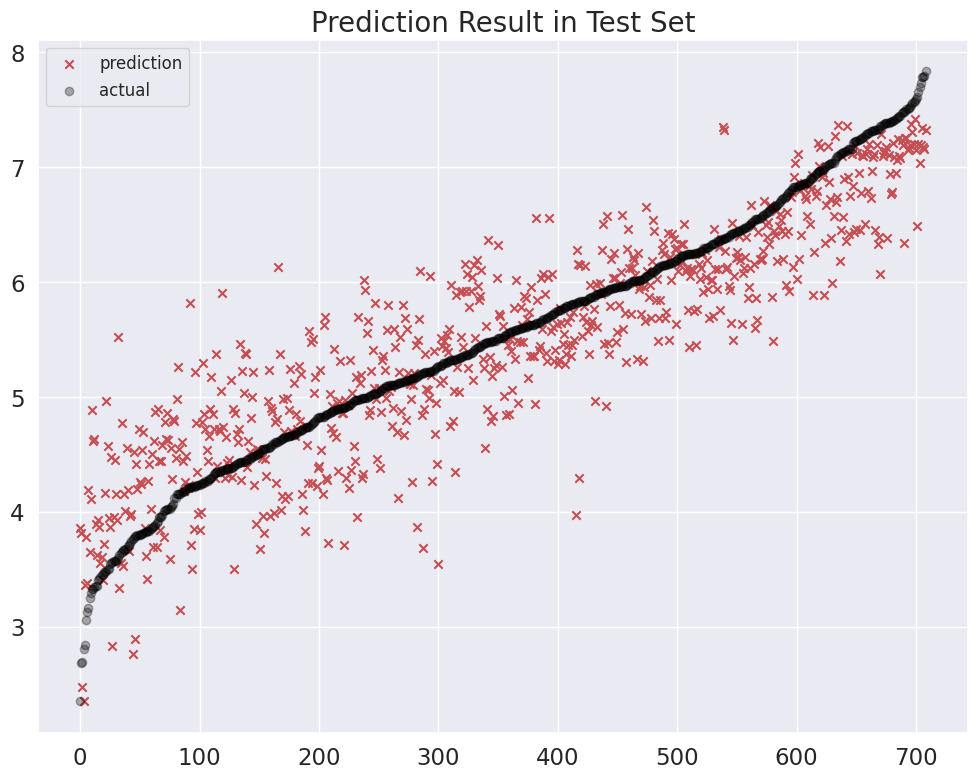

In [72]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

##[4-4-2] : 모델의 성능 평가 (R-squred 와 RMSE(Root Mean Squared Eror))


In [73]:
### R squared
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.7653093303732251
0.7869589151264086


In [74]:
### RMSE(Root Mean Squared Eror)
from sklearn.metrics import mean_squared_error
from math import sqrt

### training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

### test set
print(sqrt(mean_squared_error(y_test, pred_test)))

0.544461575968302
0.5205882145362843


In [75]:
### 해설) Test set에서 해당 예측 모델의 R squared가 0.78이고, RMSE가 0.52입니다.
### 결과는 매번 조금씩 달라 질 수 있습니다. 학습셋(training set)과 테스트 셋(test set)이 랜덤 샘플링으로 달라지기 때문입니다.